In [1]:
import numpy as np
import pylab as pl
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV

In [2]:
df = pd.read_csv(r'C:\Users\User\Downloads\udemy_courses.csv')

In [3]:
df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB


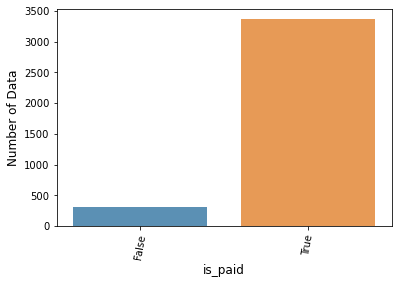

In [5]:
cnt_pro = df['is_paid'].value_counts()
plt.figure(figsize=(6,4))
sns.barplot(cnt_pro.index, cnt_pro.values, alpha=0.8)
plt.ylabel('Number of Data', fontsize=12)
plt.xlabel('is_paid', fontsize=12)
plt.xticks(rotation=80)
plt.show();

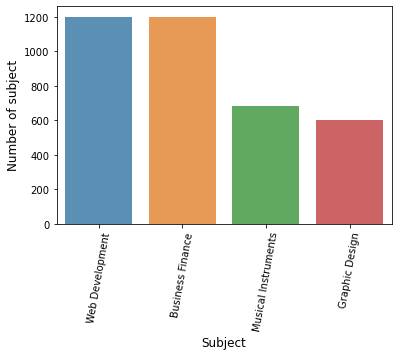

In [6]:
cnt_pro = df['subject'].value_counts()
plt.figure(figsize=(6,4))
sns.barplot(cnt_pro.index, cnt_pro.values, alpha=0.8)
plt.ylabel('Number of subject', fontsize=12)
plt.xlabel('Subject', fontsize=12)
plt.xticks(rotation=80)
plt.show();

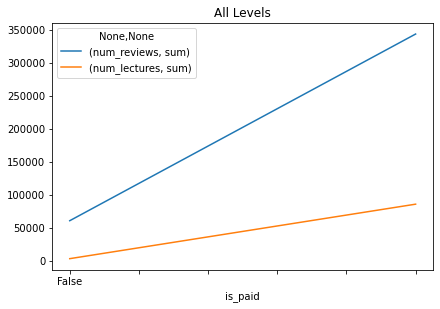

In [7]:
num_reviews= df[df['level']=='All Levels'].groupby(['is_paid']).agg({'num_reviews':['sum']})
num_lectures = df[df['level']=='All Levels'].groupby(['is_paid']).agg({'num_lectures':['sum']})
total= num_reviews.join(num_lectures)


plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
total.plot(ax=plt.gca(), title='All Levels')

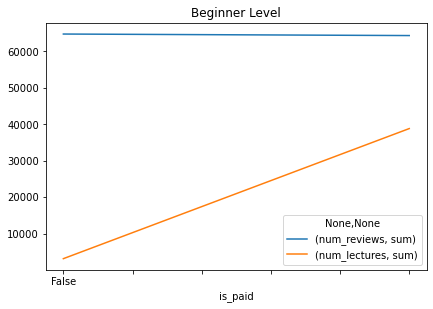

In [8]:
num_reviews= df[df['level']=='Beginner Level'].groupby(['is_paid']).agg({'num_reviews':['sum']})
num_lectures = df[df['level']=='Beginner Level'].groupby(['is_paid']).agg({'num_lectures':['sum']})
total= num_reviews.join(num_lectures)


plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
total.plot(ax=plt.gca(), title='Beginner Level')

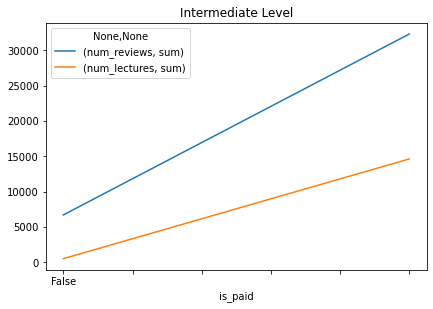

In [9]:
num_reviews= df[df['level']=='Intermediate Level'].groupby(['is_paid']).agg({'num_reviews':['sum']})
num_lectures = df[df['level']=='Intermediate Level'].groupby(['is_paid']).agg({'num_lectures':['sum']})
total= num_reviews.join(num_lectures)


plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
total.plot(ax=plt.gca(), title='Intermediate Level')

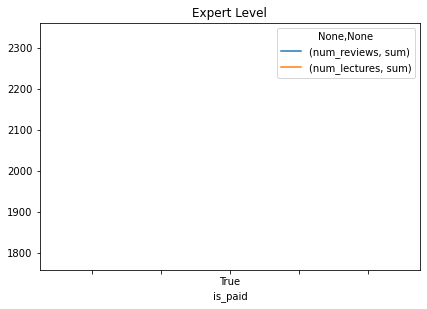

In [10]:
num_reviews= df[df['level']=='Expert Level'].groupby(['is_paid']).agg({'num_reviews':['sum']})
num_lectures = df[df['level']=='Expert Level'].groupby(['is_paid']).agg({'num_lectures':['sum']})
total= num_reviews.join(num_lectures)


plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
total.plot(ax=plt.gca(), title='Expert Level')

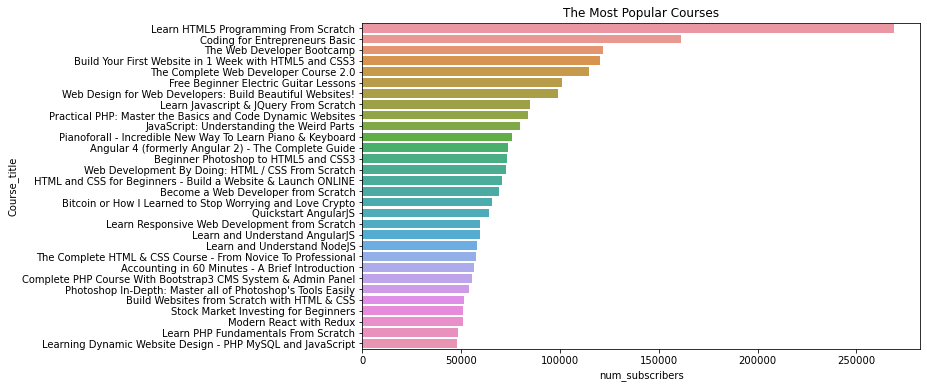

In [11]:
#Top 30 Most Popular Courses by num_subscribers
top_course = df.sort_values(by='num_subscribers', ascending=False)[:30]
figure = plt.figure(figsize=(10,6))
sns.barplot(y=top_course.course_title, x=top_course.num_subscribers)
plt.xticks()
plt.xlabel('num_subscribers')
plt.ylabel('Course_title')
plt.title('The Most Popular Courses')
plt.show()

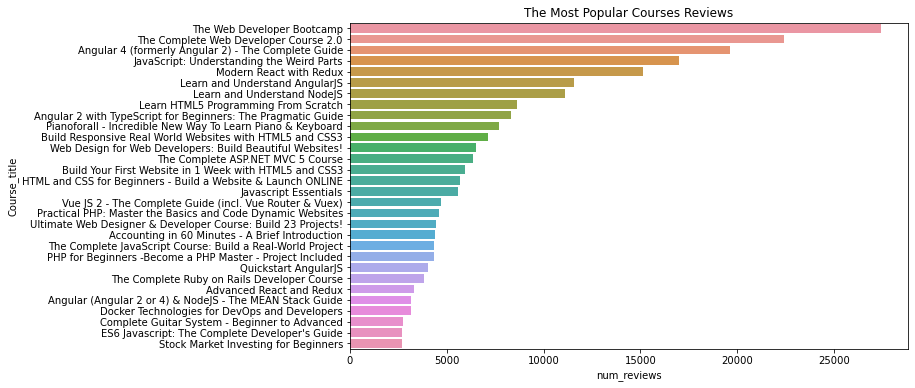

In [12]:
#Top 30 Most Popular Courses Reviews by num_reviews
top_course = df.sort_values(by='num_reviews', ascending=False)[:30]
figure = plt.figure(figsize=(10,6))
sns.barplot(y=top_course.course_title, x=top_course.num_reviews)
plt.xticks()
plt.xlabel('num_reviews')
plt.ylabel('Course_title')
plt.title('The Most Popular Courses Reviews')
plt.show()

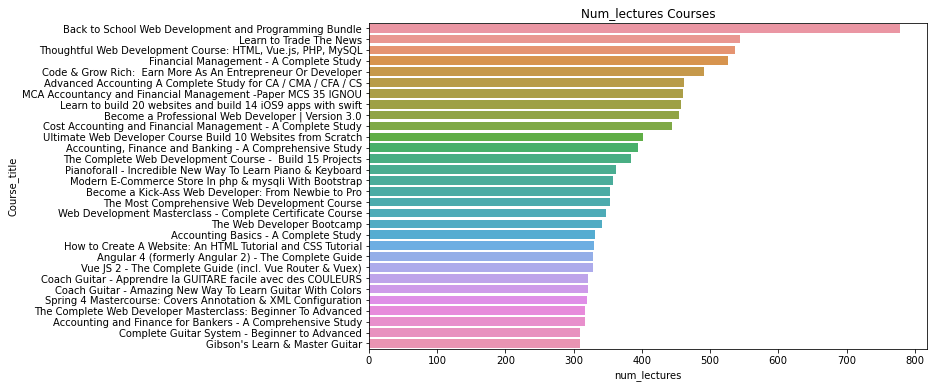

In [13]:
#Top 30 Num_lectures by num_lectures
top_course = df.sort_values(by='num_lectures', ascending=False)[:30]
figure = plt.figure(figsize=(10,6))
sns.barplot(y=top_course.course_title, x=top_course.num_lectures)
plt.xticks()
plt.xlabel('num_lectures')
plt.ylabel('Course_title')
plt.title('Num_lectures Courses')
plt.show()

In [14]:
#Frequency distribution of classes"
train_outcome = pd.crosstab(index=df["is_paid"],  # Make a crosstab
                              columns="count")      # Name the count column

train_outcome

col_0,count
is_paid,
False,310
True,3368


In [17]:
Data1= df[['is_paid','price','num_subscribers','num_reviews','num_lectures','content_duration','subject']]

In [18]:
subject = {'Web Development': 1 ,'Business Finance': 2, 'Musical Instruments': 3, 'Graphic Design': 4} 
Data1.subject = [subject[item] for item in Data1.subject] 
print(Data1)

      is_paid  price  num_subscribers  num_reviews  num_lectures  \
0        True    200             2147           23            51   
1        True     75             2792          923           274   
2        True     45             2174           74            51   
3        True     95             2451           11            36   
4        True    200             1276           45            26   
...       ...    ...              ...          ...           ...   
3673     True    100             1040           14            21   
3674     True     25              306            3            42   
3675     True     40              513          169            48   
3676     True     50              300           31            38   
3677     True     45              901           36            20   

      content_duration  subject  
0                  1.5        2  
1                 39.0        2  
2                  2.5        2  
3                  3.0        2  
4            

C:\Users\User\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [19]:
print("Any missing sample in test set:",Data1.isnull().values.any(), "\n")

Any missing sample in test set: False 



In [20]:
from sklearn.model_selection import train_test_split
Y = Data1['is_paid']
X = Data1.drop(columns=['is_paid'])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=9)

In [21]:
# We define the number of trees in the forest in 100. 

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

# We define the model
rfcla = RandomForestClassifier(n_estimators=100,random_state=49,n_jobs=-1)

# We train model
rfcla.fit(X_train, Y_train)

# We predict target values
Y_predict5 = rfcla.predict(X_test)

In [22]:
Y_predict5

array([ True,  True, False,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True, False,

In [23]:
test_acc_rfcla = round(rfcla.fit(X_train,Y_train).score(X_test, Y_test)* 100, 2)
train_acc_rfcla = round(rfcla.fit(X_train, Y_train).score(X_train, Y_train)* 100, 2)

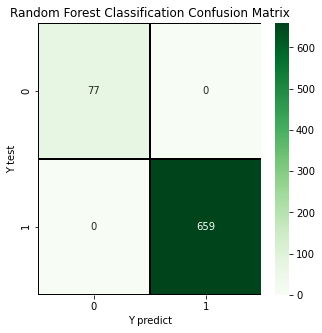

In [24]:
# The confusion matrix
rfcla_cm = confusion_matrix(Y_test, Y_predict5)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(rfcla_cm, annot=True, linewidth=0.7, linecolor='black', fmt='g', ax=ax, cmap="Greens")
plt.title('Random Forest Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

In [25]:
model1 = pd.DataFrame({
    'Model': ['Random Forest'],
    'Train Score': [train_acc_rfcla],
    'Test Score': [test_acc_rfcla]
})
model1.sort_values(by='Test Score', ascending=False)

,Model,Train Score,Test Score
0,Random Forest,100.0,100.0
